<a href="https://colab.research.google.com/github/Wdwood12/ASS_DATA2/blob/main/%238_child_food_security.plt.sns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8 – Matplotlib & Seaborn

Investigating Child Poverty and Food Insecurity in Different States

Woodelyne Durosier

Introduction

This analysis uses a curated dataset on food insecurity and poverty for 20 U.S. states.

The data were compiled from multiple public sources, including:

**Feeding America – Map the Meal Gap **(child food insecurity rates and counts, average meal cost, budget shortfall)

**USDA Economic Research Service** (household food insecurity rates)

**U.S. Census Bureau CPS ASEC** (child poverty and female-headed household poverty)

I chose this dataset because child food insecurity is an urgent public health issue with long-term consequences on health, development, and education. Visualizing these trends helps identify the states most affected and examine how poverty correlates with food insecurity.

The cleaned file, **Food_security_cleaned.csv,** compiles and simplifies those public sources into a single table with one entry for each state.

In this project, I focus on two main questions:

Which states have the greatest rates of kid food insecurity?

What's the link between child poverty and food insecurity?


Matplotlib and Seaborn are used to generate and compare different visualizations that address these problems, as well as to practice modifying plot attributes.


In [3]:
## Data Exploration/ Wangling
# importing the dataset into a DataFrame and review its structure

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# enhance Seaborn style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("Food_security_cleaned.csv")

# Preview
df.head()

# Basic shape of the dataset
print("Rows, Columns:", df.shape)

# Column data type in info.
df.info()

# Numeric variable column statistics
df.describe()

# explore missing value
df.isna().sum()

#  Ensure numeric types (in case they were read as object)
numeric_cols = [
    "Child FI Rate (%)",
    "Food-Insecure Children",
    "Avg Meal Cost ($)",
    "Budget Shortfall ($)",
    "Household FI Rate (%)",
    "Very Low FI Rate (%)",
    "Child Poverty Rate (%)",
    "Female-Headed HH Poverty (%)"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# States are sorted by the rate of child food insecurity (descending).
df_sorted_fi = df.sort_values("Child FI Rate (%)", ascending=False).reset_index(drop=True)

# Plotting legends "Top 5" flag creation
top_n = 5
threshold = df_sorted_fi["Child FI Rate (%)"].nlargest(top_n).min()
df_sorted_fi["Top 5 Child FI"] = np.where(
    df_sorted_fi["Child FI Rate (%)"] >= threshold, "Top 5 Highest FI", "Other States"
)

df_sorted_fi.head()



Rows, Columns: (20, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         20 non-null     object 
 1   Child FI Rate (%)             20 non-null     float64
 2   Food-Insecure Children        20 non-null     int64  
 3   Avg Meal Cost ($)             20 non-null     float64
 4   Budget Shortfall ($)          20 non-null     int64  
 5   Household FI Rate (%)         20 non-null     float64
 6   Very Low FI Rate (%)          20 non-null     float64
 7   Child Poverty Rate (%)        20 non-null     float64
 8   Female-Headed HH Poverty (%)  20 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.5+ KB


,State,Child FI Rate (%),Food-Insecure Children,Avg Meal Cost ($),Budget Shortfall ($),Household FI Rate (%),Very Low FI Rate (%),Child Poverty Rate (%),Female-Headed HH Poverty (%),Top 5 Child FI
0,Arkansas,24.0,167940,3.22,361480,18.9,6.7,21.0,36.7,Top 5 Highest FI
1,Louisiana,23.4,248630,3.37,528460,16.2,6.1,22.0,36.7,Top 5 Highest FI
2,New Mexico,23.3,104390,3.32,220450,12.9,5.0,23.0,36.7,Top 5 Highest FI
3,Texas,22.2,1673600,3.11,3159480,16.9,6.4,18.5,36.7,Top 5 Highest FI
4,Alabama,22.2,250580,3.50,594020,11.5,4.4,22.0,36.7,Top 5 Highest FI


The dataset consists of:
 20 rows and 9 numerical variables linked to food insecurity.



There were no missing values in the major analysis columns.



Numerical fields include:





Child FI Rate (%)



Food Insecure Children



Average Meal Cost: ($)



Budget shortfall ($)



Child poverty rate (percentage)



Household Fi Rate (%)

An assessment of summary statistics revealed significant heterogeneity among states in terms of food insecurity and poverty, highlighting the need for visual
analysis.

Before the visualization, the following procedures were taken:

Ensured that all numeric columns were correctly translated to numeric types.

The data was sorted by Child Food Insecurity Rate (%), from highest to lowest.

Added a new column classifying each state as either:



Top 5 Highest FI.



Other States



Prepared data for ranking and side-by-side comparison.

This minimal wrangling ensures that the visualizations appropriately depict the distribution and ranking of states.

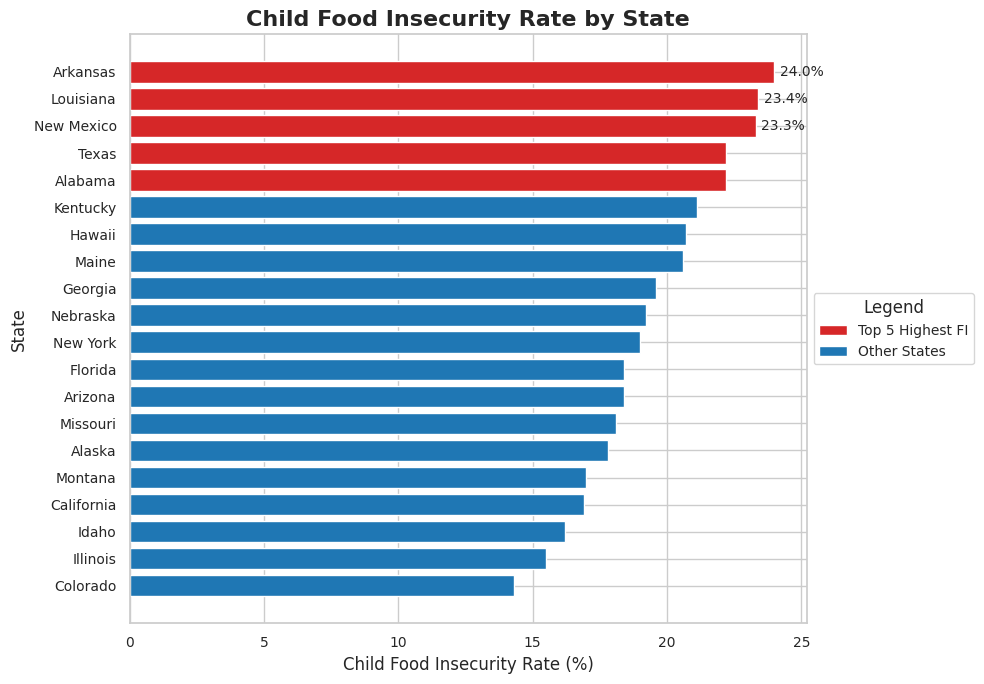

In [4]:
## Visualizations
# The goal of this assignment is to show proficiency with matplotlib and seaborn, creating a series of cutomized visualizations.

### 1 - Matplotlib Visual
### a. Child Food insecurity Rate by States (Horizontal bar)

# Figure size
plt.figure(figsize=(10, 7))

# Color mapping based on the "Top 5" flag

colors = df_sorted_fi["Top 5 Child FI"].map({
    "Top 5 Highest FI": "tab:red",
    "Other States": "tab:blue"
})

# Horizontal bar plot
bars = plt.barh(
    df_sorted_fi["State"],
    df_sorted_fi["Child FI Rate (%)"],
    color=colors
)

# Invert y-axis so highest is at the top
plt.gca().invert_yaxis()

# Titles and labels with custom font sizes
plt.title("Child Food Insecurity Rate by State", fontsize=16, fontweight="bold")
plt.xlabel("Child Food Insecurity Rate (%)", fontsize=12)
plt.ylabel("State", fontsize=12)

# Add a legend outside the plot
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="tab:red", label="Top 5 Highest FI"),
    Patch(facecolor="tab:blue", label="Other States")
]
plt.legend(
    handles=legend_elements,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title="Legend",
    fontsize=10
)

# Annotate the top 3 bars with exact values
for i,(state, rate) in enumerate(zip(df_sorted_fi["State"], df_sorted_fi["Child FI Rate (%)"])):
    if i < 3:  # top 3
        plt.text(
            rate + 0.2,  # slightly to the right of the bar
            i,
            f"{rate:.1f}%",
            va="center",
            fontsize=10
        )

# Adjust tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Matplotlib bar chart compares the 20 states' child food insecurity rates (%).

The top five states are marked in red, while the others appear in blue.
I added the following Matplotlib customisation options:

Changed the position of the legend (outside the plot).

Customized bar colors

Changed title and axis labels.

Added annotations indicating precise percentages.

Changed the size of the tick labels.

Inverted y-axis for ranking order.

Interpretation:
Arkansas, Louisiana, New Mexico, Texas, and Alabama had the greatest levels of child food insecurity in this sample, with rates ranging from 22-24%. These states are outliers and may require more specific assistance measures.

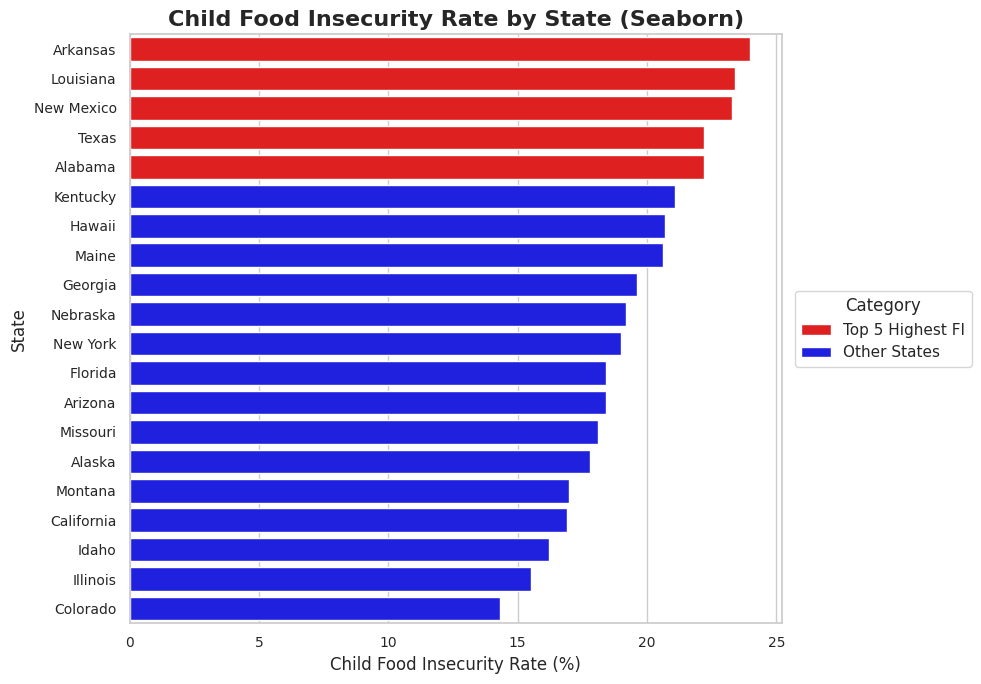

In [5]:
### Seaborn Visualizations
## Chilf Barplot(Child FI Rate by State)

plt.figure(figsize=(10, 7))

# Order states by child FI rate
order_states = df_sorted_fi["State"]

sns.barplot(
    data=df_sorted_fi,
    x="Child FI Rate (%)",
    y="State",
    hue="Top 5 Child FI",  # automatic legend
    order=order_states,
    palette={"Top 5 Highest FI": "red", "Other States": "Blue"}
)

plt.title("Child Food Insecurity Rate by State (Seaborn)", fontsize=16, fontweight="bold")
plt.xlabel("Child Food Insecurity Rate (%)", fontsize=12)
plt.ylabel("State", fontsize=12)

plt.legend(
    title="Category",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    borderaxespad=0.
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

This Seaborn barplot replicates the Matplotlib ranking with Seaborn's built-in aesthetics.
Customizations include:





Using hue to differentiate the top five from the others.



Custom color palette



Ordered y-axis by FI rate.



Cleaner default style and less manual configuration

Interpretation:
The visual story is the same as the Matplotlib version: a subgroup of states consistently has higher kid food insecurity.

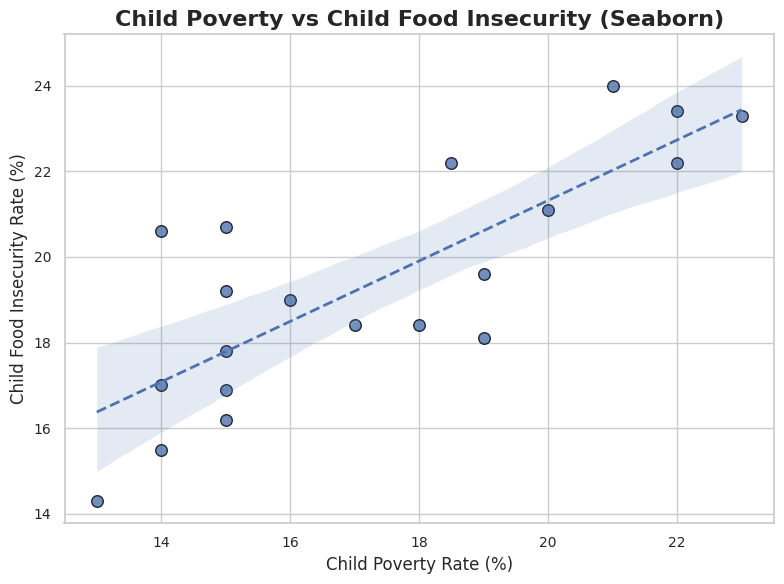

In [6]:
## Seaborn Regression Plot(Child Poverty vs Child FI)
# sns.regplot is use to combines scattered point and a regression line.

plt.figure(figsize=(8, 6))

sns.regplot(
    data=df,
    x="Child Poverty Rate (%)",
    y="Child FI Rate (%)",
    scatter_kws={"s": 70, "alpha": 0.8, "edgecolor": "black"},
    line_kws={"linewidth": 2, "linestyle": "--"}
)

plt.title("Child Poverty vs Child Food Insecurity (Seaborn)", fontsize=16, fontweight="bold")
plt.xlabel("Child Poverty Rate (%)", fontsize=12)
plt.ylabel("Child Food Insecurity Rate (%)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


Customizations include:





Scatter size and edge color.



Dashed trend line



Tight arrangement for readability.

Interpretation:
The regression line highlights an increasing trend: states with greater child poverty rates nearly invariably have higher child food insecurity.

Seaborn used less code than the Matplotlib version to provide a clean, polished result.


Comparison Maplotlib vs. seaborn

Matplotlib allows complete control over all aspects of a visualization. It is very customisable, but requires more code and human tweaks (for example, legend positioning, annotations, and tick formatting). The Matplotlib charts in this assignment exhibit this versatility.

Seaborn, developed on top of Matplotlib, provides higher-level abstractions and more appealing default styles. Many actions that Matplotlib needs you to write manually may be automated using functions such as sns.barplot() and sns.regplot(). Seaborn is best for fast exploration, but Matplotlib is better suited for detailed, presentation-ready graphics.

Both libraries complement one another, and utilizing them together results in a complete analytical workflow.

(array([12., 14., 16., 18., 20., 22., 24., 26.]),
 [Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18'),
  Text(0, 20.0, '20'),
  Text(0, 22.0, '22'),
  Text(0, 24.0, '24'),
  Text(0, 26.0, '26')])

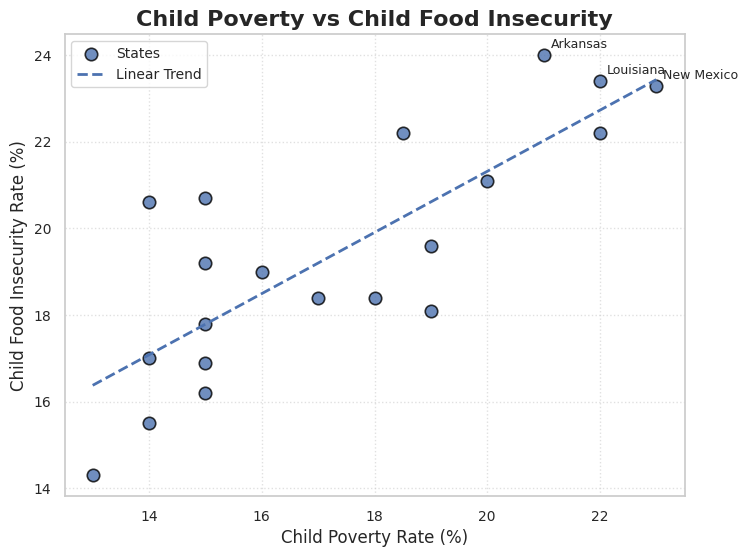

In [8]:
## Matplotlib Scatter Plot -Porverty vs Food Insecurity
plt.figure(figsize=(8, 6))

x = df["Child Poverty Rate (%)"]
y = df["Child FI Rate (%)"]

# Scatter plot with custom markers
plt.scatter(x, y, marker="o", s=80, edgecolors="black", linewidths=1.2, alpha=0.8, label="States")

# Fit and plot a simple linear regression line
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, poly1d_fn(x_line), linestyle="--", linewidth=2, label="Linear Trend")

# Titles and labels
plt.title("Child Poverty vs Child Food Insecurity", fontsize=16, fontweight="bold")
plt.xlabel("Child Poverty Rate (%)", fontsize=12)
plt.ylabel("Child Food Insecurity Rate (%)", fontsize=12)

# Add grid
plt.grid(True, linestyle=":", alpha=0.6)

# Annotate a few states (e.g., top FI states)
for _, row in df_sorted_fi.head(3).iterrows():
    plt.annotate(
        row["State"],
        (row["Child Poverty Rate (%)"], row["Child FI Rate (%)"]),
        textcoords="offset points",
        xytext=(5, 5),
        fontsize=9
    )

# Legend with custom position and font size
plt.legend(loc="upper left", fontsize=10)

# Modify tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

This scatter plot looks at the association between child poverty (%) and child food insecurity (%).
A dashed regression line depicts the general trend, with the top three states highlighted for emphasis.

Interpretation:
Child poverty and food insecurity have a substantial positive correlation (r = 0.80). Child food insecurity is virtually always more prevalent in states with greater child poverty rates. Arkansas, Louisiana, and New Mexico are in the upper-right quadrant, signifying strong scores in both categories.


## Conclusion

This analysis focuses on two major findings:


States having the greatest rates of child food insecurity:

Arkansas, Louisiana, New Mexico, Texas, and Alabama had the highest child food insecurity rates in this sample, with values more than 20%. These states consistently show out in Matplotlib and Seaborn visualizations.

Poverty is significantly associated with food insecurity.

Child poverty and food insecurity have a substantial positive connection (r ≈ 0.80), suggesting that economic stress greatly raises the likelihood of hunger. Poverty-reduction policies, such as food assistance programs, greater pay ceilings, and more access to social services, have the potential to directly reduce child food insecurity.

Creating these visualizations using Matplotlib and Seaborn illustrates how graphical tools may help people grasp complicated societal concerns. Visual analysis uncovers patterns that may not be readily apparent from summary statistics alone, strengthening data-driven public health insights.

In [ ]:
#####_______________#######